## Pipeline Development

In [1]:
import pandas as pd
df = pd.read_csv('HousingData/realtor-data.zip.csv.zip', compression='zip')
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Functions
def load_data(use_sample=False):
    df = pd.read_csv('HousingData/realtor-data.zip.csv.zip', compression='zip')
    print("Data Shape:", df.shape)
    print("Column Names:", list(df.columns))
    print("\nData Types\n:", df.dtypes)
    print("\nFirst few rows:")
    display(df.head())
    if use_sample:
        df = df.sample(5000)
        print("\nSample df Shape:", df.shape)
    return df

def prepare_data(df, target='price'):
    df = df.dropna()
    X = df.drop(columns=target).copy()
    y = df[target].copy()

    numerical_cols = X.select_dtypes(include='number').columns.to_list()
    categorical_cols = X.select_dtypes(exclude='number').columns.to_list()

    # Scale numerical
    if numerical_cols:
        scaler = StandardScaler()
        X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

    # OHE categorical
    if categorical_cols:
        X = pd.get_dummies(X, columns=categorical_cols)
    return X, y

def split_data(X, y, split=0.8, random_state=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=random_state)
    print("Split Training:", split)
    # X_train.to_csv("processed_data/X_train.csv", index=False)
    # X_test.to_csv("processed_data/X_test.csv", index=False)
    # y_train.to_csv("processed_data/y_train.csv", index=False, header=['price'])
    # y_test.to_csv("processed_data/y_test.csv", index=False, header=['price'])
    return X_train, X_test, y_train, y_test

def log_stats(df, X_train, X_test, y_train, y_test):
    stats = pd.DataFrame({
        'metric': ['original_rows', 'original_cols', 'train_size', 'test_size', 
                   'num_features', 'target_mean', 'target_std'],
        'value': [df.shape[0], df.shape[1], len(X_train), len(X_test), 
                  X_train.shape[1], y_train.mean(), y_train.std()]})
    # stats.to_csv("processed_data_stats.csv", index=False)
    display(stats)
    return stats

def fit_model(X_train, X_test, y_train, y_test, model='gradient_boost'):
    if model == 'random_forest':
        model = RandomForestRegressor().fit(X_train, y_train)
    if model == 'gradient_boost':
        model = GradientBoostingRegressor().fit(X_train, y_train)
    else:
        model = LinearRegression().fit(X_train, y_train)
        
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE:", mse, "\nMAE:", mae)
    print("R2:", r2)
    return y_pred

def run_pipeline():
    df = load_data(use_sample=True)
    X, y = prepare_data(df)
    X_train, X_test, y_train, y_test = split_data(X, y)
    stats = log_stats(df, X_train, X_test, y_train, y_test)
    predictions = fit_model(X_train, X_test, y_train, y_test, model='random_forest')
    return stats, X_train, X_test, y_train, y_test
    

In [47]:
stats, X_train, X_test, y_train, y_test = run_pipeline()

Data Shape: (2226382, 12)
Column Names: ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']

Data Types
: brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

First few rows:


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN



Sample df Shape: (5000, 12)
Split Training: 0.8


,metric,value
0,original_rows,5000.000000
1,original_cols,12.000000
2,train_size,1960.000000
3,test_size,491.000000
4,num_features,2544.000000
5,target_mean,553818.085204
6,target_std,949479.446694


MSE: 687406093090.406 
MAE: 344849.08269524056
R2: 0.3119939584582272


In [38]:
# Pipeline
df = load_data(use_sample=True)
X, y = prepare_data(df)
X_train, X_test, y_train, y_test = split_data(X, y)
y_pred = fit_model(X_train, X_test, y_train, y_test, model='random_forest')

run_pipeline()

Data Shape: (2226382, 12)
Column Names: ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']

Data Types
: brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

First few rows:


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN



Sample df Shape: (5000, 12)
Split Training: 0.8
MSE: 207594752546.30533 
MAE: 192093.64056451613
R2: 0.39309449919203887


# Run Full Pipeline

In [1]:
from model1 import DataPipeline
obj = DataPipeline()

obj.run_pipeline(use_sample=True,
                 model_type='random_forest',
                 save_output=False)

Data Shape: (2226382, 12)
Column Names: ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']

Data Types
: brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

First few rows:


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN



Sample df Shape: (5000, 12)
Split Training: 0.8


,metric,value
0,original_rows,5000.000000
1,original_cols,12.000000
2,train_size,1912.000000
3,test_size,479.000000
4,num_features,2527.000000
5,target_mean,549938.760983
6,target_std,822882.794774


Processed data saved
MSE: 377812723748.62396 
MAE: 228794.63081419622
R2: 0.43236128175438526


(          metric          value
 0  original_rows    5000.000000
 1  original_cols      12.000000
 2     train_size    1912.000000
 3      test_size     479.000000
 4   num_features    2527.000000
 5    target_mean  549938.760983
 6     target_std  822882.794774,
          brokered_by       bed      bath  acre_lot    street  zip_code  \
 1064490    -0.369908  0.572775 -0.477663 -0.030701 -0.658052  0.730224   
 318718     -1.115823 -1.156397 -0.477663 -0.031374  0.471125 -0.903932   
 524901     -0.978104 -1.156397 -1.346174 -0.030911 -0.563874 -0.729765   
 1526288    -1.494476 -0.291811 -1.346174 -0.031037  0.890718 -1.223458   
 501931     -0.221397  0.572775 -0.477663 -0.030785  0.547789 -0.743108   
 ...              ...       ...       ...       ...       ...       ...   
 1611824    -1.001451 -0.291811 -0.477663 -0.030364 -0.740934 -0.908616   
 2175811     0.898509 -0.291811 -0.477663 -0.031080  1.603800  1.368063   
 1492087    -0.236285 -0.291811 -0.477663 -0.030743 -1.00443

In [ ]:
# %run model1.py

## Flow Chart

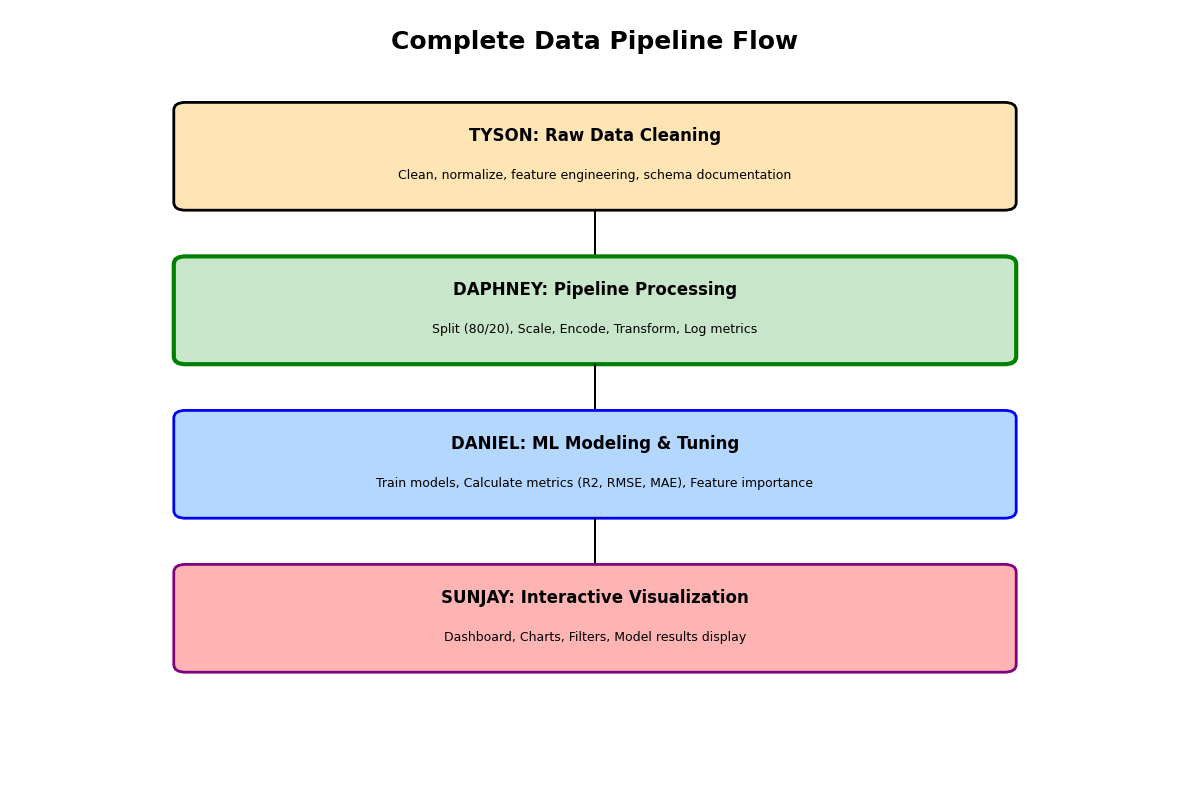

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

ax.text(5, 9.5, 'Complete Data Pipeline Flow', fontsize=18, fontweight='bold', ha='center')
box_width = 7
box_height = 1.2
x_center = 5

# Data
y1 = 7.5
rect1 = patches.FancyBboxPatch((x_center-box_width/2, y1), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#FFE5B4', edgecolor='black', linewidth=2)
ax.add_patch(rect1)
ax.text(x_center, y1+0.8, 'TYSON: Raw Data Cleaning', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y1+0.3, 'Clean, normalize, feature engineering, schema documentation', fontsize=9, ha='center')
ax.arrow(x_center, y1-0.1, 0, -0.7, head_width=0.2, head_length=0.1, fc='black')

# Pipeline
y2 = 5.5
rect2 = patches.FancyBboxPatch((x_center-box_width/2, y2), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#C8E6C9', edgecolor='green', linewidth=3)
ax.add_patch(rect2)
ax.text(x_center, y2+0.8, 'DAPHNEY: Pipeline Processing', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y2+0.3, 'Split (80/20), Scale, Encode, Transform, Log metrics', fontsize=9, ha='center')
ax.arrow(x_center, y2-0.1, 0, -0.7, head_width=0.2, head_length=0.1, fc='black')

# Modeling
y3 = 3.5
rect3 = patches.FancyBboxPatch((x_center-box_width/2, y3), box_width, box_height,
                               boxstyle="round,pad=0.1",facecolor='#B4D7FF', edgecolor='blue', linewidth=2)
ax.add_patch(rect3)
ax.text(x_center, y3+0.8, 'DANIEL: ML Modeling & Tuning', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y3+0.3, 'Train models, Calculate metrics (R2, RMSE, MAE), Feature importance', fontsize=9, ha='center')
ax.arrow(x_center, y3-0.1, 0, -0.7, head_width=0.2, head_length=0.1, fc='black')

# Viz
y4 = 1.5
rect4 = patches.FancyBboxPatch((x_center-box_width/2, y4), box_width, box_height,
                               boxstyle="round,pad=0.1", facecolor='#FFB4B4', edgecolor='purple', linewidth=2)
ax.add_patch(rect4)
ax.text(x_center, y4+0.8, 'SUNJAY: Interactive Visualization', fontsize=12, fontweight='bold', ha='center')
ax.text(x_center, y4+0.3, 'Dashboard, Charts, Filters, Model results display', fontsize=9, ha='center')
plt.tight_layout()
plt.savefig('pipeline_flow.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
import polars as pl
